# Exploring the BRFSS data


## Setup

### Load packages

In [1]:
library(ggplot2)
library(dplyr)

Warning message:
: package ‘ggplot2’ was built under R version 3.2.4
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Load data

Make sure your data and R Markdown files are in the same directory. When loaded
your data file will be called `brfss2013`. Delete this note when before you submit 
your work.

In [11]:
load("data/brfss2013.RData")
str(brfss2013)

'data.frame':	491775 obs. of  330 variables:
 $ X_state  : Factor w/ 55 levels "0","Alabama",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ fmonth   : Factor w/ 12 levels "January","February",..: 1 1 1 1 2 3 3 3 4 4 ...
 $ idate    : int  1092013 1192013 1192013 1112013 2062013 3272013 3222013 3042013 4242013 4242013 ...
 $ imonth   : Factor w/ 12 levels "January","February",..: 1 1 1 1 2 3 3 3 4 4 ...
 $ iday     : Factor w/ 31 levels "1","2","3","4",..: 9 19 19 11 6 27 22 4 24 24 ...
 $ iyear    : Factor w/ 2 levels "2013","2014": 1 1 1 1 1 1 1 1 1 1 ...
 $ dispcode : Factor w/ 2 levels "Completed interview",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seqno    : int  2013000580 2013000593 2013000600 2013000606 2013000608 2013000630 2013000634 2013000644 2013001305 2013001338 ...
 $ X_psu    : int  2013000580 2013000593 2013000600 2013000606 2013000608 2013000630 2013000634 2013000644 2013001305 2013001338 ...
 $ ctelenum : Factor w/ 1 level "Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ pvtresd1 : Factor w/ 2 levels "Yes","N

In [3]:
summary(brfss2013$ctelenum)

Yes   NA's 
491734     41

* * *

## Part 1: Data
In 2013, 50 states, the District of Columbia, Guam, and Puerto Rico collected samples of
interviews conducted both by landline telephone and cellular telephone. 

Since 2011, BRFSS conducts both landline telephone- and cellular telephone-based surveys. In conducting the BRFSS landline
telephone survey, interviewers collect data from a randomly selected adult in a household. In conducting the
cellular telephone version of the BRFSS questionnaire, interviewers collect data from an adult who participates
by using a cellular telephone and resides in a private residence or college housing.

In a telephone survey such as the BRFSS, a sample record is one telephone number in the list of all telephone
numbers the system randomly selects for dialing. To meet the BRFSS standard for the participating states'
sample designs, one must be able to justify sample records as a probability sample of all households with
telephones in the state. All participating areas met this criterion in 2013. Fifty-one projects used a
disproportionate stratified sample (DSS) design for their landline samples. Guam and Puerto Rico used a simple
random-sample design. 

In the type of DSS design that states most commonly used in the BRFSS landline telephone sampling, BRFSS
divides telephone numbers into two groups, or strata, which are sampled separately. The high-density and
medium-density strata contain telephone numbers that are expected to belong mostly to households. Whether a
telephone number goes into the high-density or medium-density stratum is determined by the number of listed
household numbers in its hundred block, or set of 100 telephone numbers with the same area code, prefix, and
first two digits of the suffix and all possible combinations of the last two digits. BRFSS puts numbers from
hundred blocks with one or more listed household numbers (“1+ blocks,” or “banks”) in either the high-density
stratum (“listed 1+ blocks”) or medium-density stratum (“unlisted 1 + blocks”). BRFSS samples the two strata
to obtain a probability sample of all households with telephones.
Cellular telephone sampling frames are commercially available and the system can call random samples of
cellular telephone numbers, but doing so requires specific protocols. The basis of the 2013 BRFSS sampling
frame is the Telecordia database of telephone exchanges (e.g., 617-492-0000 to 617-492-9999) and 1,000 banks
(e.g., 617-492-0000 to 617-492-0999). The vendor uses dedicated cellular 1,000 banks, sorted on the basis of
area code and exchange within a state. BRFSS forms an interval, K, by dividing the population count of
telephone numbers in the frame, N, by the desired sample size, n. BRFSS divides the frame of telephone
numbers into n intervals of size K telephone numbers. From each interval, BRFSS draws one 10-digit telephone
number at random.

The target population for cellular telephone samples in 2013 consists of persons residing in a private residence
or college housing, who have a working cellular telephone, are aged 18 and older, and received 90 percent or
more of their calls on cellular telephones. 



* * *

## Part 3: Exploratory data analysis

NOTE: Insert code chunks as needed by clicking on the "Insert a new code chunk" 
button (green button with orange arrow) above. Make sure that your code is visible
in the project you submit. Delete this note when before you submit your work.

**Research quesion 1:**





**Research quesion 2:**





**Research quesion 3:**

* * *

## Part 2: Research questions

**Research quesion 1:**

"Is there a relationship between How Often Do You Drink Regular Soda Or Pop (ssbsugar) and (Ever Told) You Have Diabetes (diabete3)? And how about Had A Test For High Blood Sugar In Past Three Years (pdiabtst)"

In [53]:
brfss2013_clean = brfss2013[!rowSums(is.na(brfss2013[c('diabete3','ssbsugar')])), ]

In [54]:
str(brfss2013_clean$ssbsugar)

 int [1:103031] 305 203 202 203 102 0 0 0 301 0 ...


In [55]:
summary(brfss2013_clean$ssbsugar)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0     101     124     301     399 

In [60]:
brfss2013_clean$ssbsugar[(brfss2013_clean$ssbsugar>=100) & (brfss2013_clean$ssbsugar<200)] =
brfss2013_clean$ssbsugar[(brfss2013_clean$ssbsugar>=100) & (brfss2013_clean$ssbsugar<200)] - 100


brfss2013_clean$ssbsugar[(brfss2013_clean$ssbsugar>=200) & (brfss2013_clean$ssbsugar<300)] = 
(brfss2013_clean$ssbsugar[(brfss2013_clean$ssbsugar>=200) & (brfss2013_clean$ssbsugar<300)] - 200)/7

brfss2013_clean$ssbsugar[brfss2013_clean$ssbsugar>=300] = 
(brfss2013_clean$ssbsugar[brfss2013_clean$ssbsugar>=300] - 300)/30

brfss2013_clean$ssbsugar[brfss2013_clean$ssbsugar>=10] = 10

In [61]:
str(brfss2013_clean$ssbsugar)

 num [1:103031] 0.167 0.429 0.286 0.429 2 ...


In [62]:
summary(brfss2013_clean$ssbsugar)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00000  0.00000  0.03333  0.35960  0.28570 10.00000 

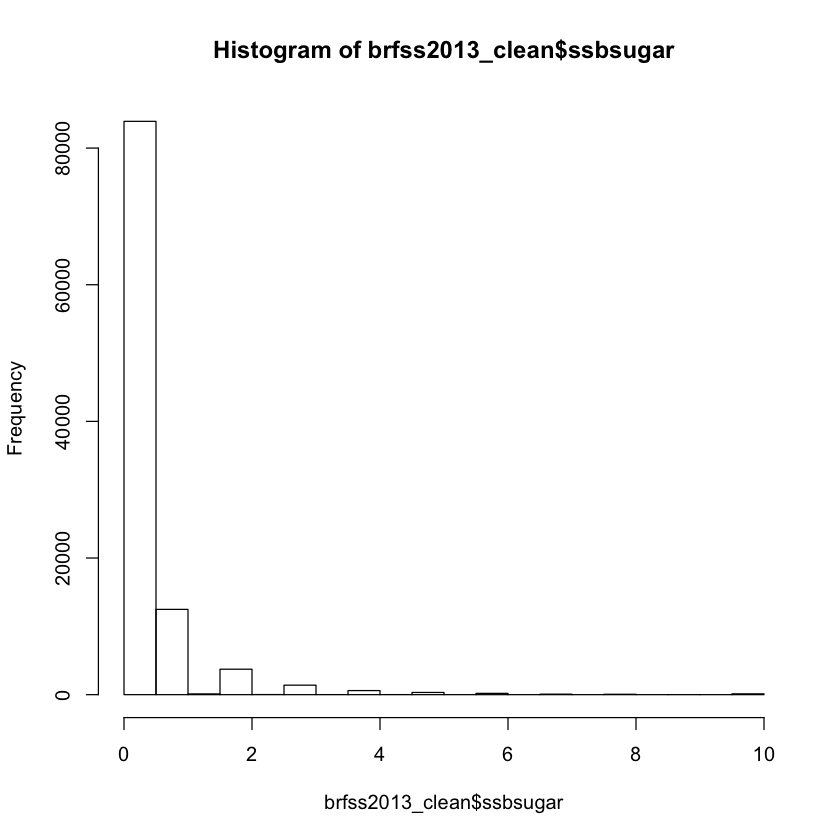

In [63]:
hist(brfss2013_clean$ssbsugar)

In [83]:
brfss2013_clean$sugarH = brfss2013_clean$ssbsugar >2

In [84]:
table(brfss2013_clean$diabete3, brfss2013_clean$sugarH)

                                            
                                             FALSE  TRUE
  Yes                                        13123   180
  Yes, but female told only during pregnancy  1012    35
  No                                         84421  2539
  No, pre-diabetes or borderline diabetes     1680    41

In [85]:
table(brfss2013_clean$pdiabtst, brfss2013_clean$sugarH)

     
      FALSE  TRUE
  Yes 36688  1012
  No  22209  1031

Conclusion for question 1:

There is no clear relationship between How Often Do You Drink Regular Soda Or Pop (ssbsugar) and (Ever Told) You Have Diabetes (diabete3).
And there no clear relationship between How Often Do You Drink Regular Soda Or Pop (ssbsugar) and Had A Test For High Blood Sugar In Past Three Years (pdiabtst).

**Research quesion 2:**

genhlth: General Health

fruit: sum of below

* fruit1: How Many Times Did You Eat Fruit?
* fvbeans: How Many Times Did You Eat Beans Or Lentils?
* fvgreen: How Many Times Did You Eat Dark Green Vegetables?
* fvorang: How Many Times Did You Eat Orange-Colored Vegetables?
* vegetab1: How Many Times Did You Eat Other Vegetables?

How's the relation between general health (genhlth) and eating no fruit every day (fruit < 1)? 

Or form the data, if we know someone is not eating fruit, what is the probability he/she has health condition poor?

In [92]:
brfss2013_clean = brfss2013[!rowSums(is.na(brfss2013[c('genhlth','fruit1', 'fvbeans', 'fvgreen', 'fvorang', 'vegetab1')])), ]

In [93]:
str(brfss2013_clean$genhlth)

 Factor w/ 5 levels "Excellent","Very good",..: 3 3 2 3 2 4 3 1 3 3 ...


In [94]:
brfss2013_clean$fruit1[(brfss2013_clean$fruit1>=100) & (brfss2013_clean$fruit1<200)] =
brfss2013_clean$fruit1[(brfss2013_clean$fruit1>=100) & (brfss2013_clean$fruit1<200)] - 100

brfss2013_clean$fruit1[(brfss2013_clean$fruit1>=200) & (brfss2013_clean$fruit1<300)] = 
(brfss2013_clean$fruit1[(brfss2013_clean$fruit1>=200) & (brfss2013_clean$fruit1<300)] - 200)/7

brfss2013_clean$fruit1[brfss2013_clean$fruit1>=300] = 
(brfss2013_clean$fruit1[brfss2013_clean$fruit1>=300] - 300)/30

brfss2013_clean$fruit1[brfss2013_clean$fruit1>=10] = 10

##
brfss2013_clean$fvbeans[(brfss2013_clean$fvbeans>=100) & (brfss2013_clean$fvbeans<200)] =
brfss2013_clean$fvbeans[(brfss2013_clean$fvbeans>=100) & (brfss2013_clean$fvbeans<200)] - 100

brfss2013_clean$fvbeans[(brfss2013_clean$fvbeans>=200) & (brfss2013_clean$fvbeans<300)] = 
(brfss2013_clean$fvbeans[(brfss2013_clean$fvbeans>=200) & (brfss2013_clean$fvbeans<300)] - 200)/7

brfss2013_clean$fvbeans[brfss2013_clean$fvbeans>=300] = 
(brfss2013_clean$fvbeans[brfss2013_clean$fvbeans>=300] - 300)/30

brfss2013_clean$fvbeans[brfss2013_clean$fvbeans>=10] = 10


##
brfss2013_clean$fvgreen[(brfss2013_clean$fvgreen>=100) & (brfss2013_clean$fvgreen<200)] =
brfss2013_clean$fvgreen[(brfss2013_clean$fvgreen>=100) & (brfss2013_clean$fvgreen<200)] - 100

brfss2013_clean$fvgreen[(brfss2013_clean$fvgreen>=200) & (brfss2013_clean$fvgreen<300)] = 
(brfss2013_clean$fvgreen[(brfss2013_clean$fvgreen>=200) & (brfss2013_clean$fvgreen<300)] - 200)/7

brfss2013_clean$fvgreen[brfss2013_clean$fvgreen>=300] = 
(brfss2013_clean$fvgreen[brfss2013_clean$fvgreen>=300] - 300)/30

brfss2013_clean$fvgreen[brfss2013_clean$fvgreen>=10] = 10


##
brfss2013_clean$fvorang[(brfss2013_clean$fvorang>=100) & (brfss2013_clean$fvorang<200)] =
brfss2013_clean$fvorang[(brfss2013_clean$fvorang>=100) & (brfss2013_clean$fvorang<200)] - 100

brfss2013_clean$fvorang[(brfss2013_clean$fvorang>=200) & (brfss2013_clean$fvorang<300)] = 
(brfss2013_clean$fvorang[(brfss2013_clean$fvorang>=200) & (brfss2013_clean$fvorang<300)] - 200)/7

brfss2013_clean$fvorang[brfss2013_clean$fvorang>=300] = 
(brfss2013_clean$fvorang[brfss2013_clean$fvorang>=300] - 300)/30

brfss2013_clean$fvorang[brfss2013_clean$fvorang>=10] = 10


##
brfss2013_clean$vegetab1[(brfss2013_clean$vegetab1>=100) & (brfss2013_clean$vegetab1<200)] =
brfss2013_clean$vegetab1[(brfss2013_clean$vegetab1>=100) & (brfss2013_clean$vegetab1<200)] - 100

brfss2013_clean$vegetab1[(brfss2013_clean$vegetab1>=200) & (brfss2013_clean$vegetab1<300)] = 
(brfss2013_clean$vegetab1[(brfss2013_clean$vegetab1>=200) & (brfss2013_clean$vegetab1<300)] - 200)/7

brfss2013_clean$vegetab1[brfss2013_clean$vegetab1>=300] = 
(brfss2013_clean$vegetab1[brfss2013_clean$vegetab1>=300] - 300)/30

brfss2013_clean$vegetab1[brfss2013_clean$vegetab1>=10] = 10

In [95]:
brfss2013_clean$fruit = 
    brfss2013_clean$fruit1 + 
    brfss2013_clean$fvbeans + 
    brfss2013_clean$fvgreen + 
    brfss2013_clean$fvorang + 
    brfss2013_clean$vegetab1

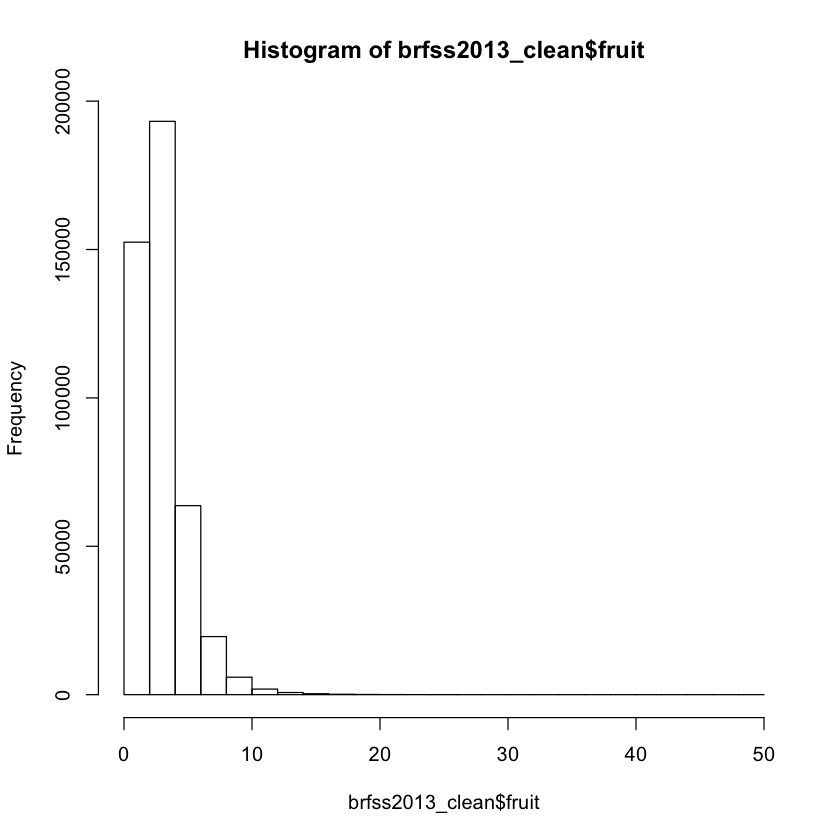

In [96]:
hist(brfss2013_clean$fruit)

We define health condition above 'Good' to be 'Good', and blow 'Good' to be 'Poor'

In [111]:
brfss2013_clean$genhlth[brfss2013_clean$genhlth=='Excellent'] = 'Good'
brfss2013_clean$genhlth[brfss2013_clean$genhlth=='Very good'] = 'Good'

brfss2013_clean$genhlth[brfss2013_clean$genhlth=='Fair'] = 'Poor'

In [112]:
table(brfss2013_clean$fruit < 1, brfss2013_clean$genhlth)

       
        Excellent Very good   Good   Fair   Poor
  FALSE         0         0 325584      0  69365
  TRUE          0         0  30230      0  12859

In [118]:
# Percentage of Poor is:
p_poor = (69365 + 12859) / sum(table(brfss2013_clean$fruit < 1, brfss2013_clean$genhlth))
p_poor

[1] 0.1877097

In [119]:
# Under poor health people, percentage of eating no vegi (brfss2013_clean$fruit < 1)
p_noVegi_knowing_poor = 12859 / (12859 + 69365)
p_noVegi_knowing_poor

[1] 0.1563899

In [120]:
# Under good health people (> poor), percentage of eating no vegi (brfss2013_clean$fruit < 1)
p_noVegi_knowing_good = (30230) / (30230 + 325584)
p_noVegi_knowing_good

[1] 0.08496012

In [121]:
# if we know someone is not eating fruit, what is the probability he/she has health condition poor?
# using Bayes' theorem:
p_noVegi_knowing_poor * p_poor / (p_noVegi_knowing_poor * p_poor + (1-p_poor)*p_noVegi_knowing_good)

[1] 0.2984288

In [122]:
# Or direct calculation from data:
12859/(12859+30230)

[1] 0.2984288

In [123]:
# if we know someone eating fruit, what is the probability he/she has health condition poor?# 
69365 / (325584+69365)

[1] 0.1756303

Thus: 
if we know someone is not eating fruit/vegi, the probability he/she being poor heath is around 30%.
if we know someone is eating fruit/vegi at least once a day, the probability he/she being poor heath is around 17.6%.
This means eating vegi/fruit is good for heath.


**Research quesion 3:**

Is Computed Height In Meters (htm4) following normal distribution?

In [142]:
brfss2013 = brfss2013[!rowSums(is.na(brfss2013[c('htm4')])), ]

In [143]:
summary(brfss2013$htm4)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  100.0   163.0   168.0   169.3   178.0   236.0 

In [144]:
str(brfss2013$htm4)

 num [1:484118] 170 178 163 163 183 160 152 165 188 165 ...


In [145]:
brfss2013$htm4[brfss2013$htm4>244] = NA
brfss2013$htm4[brfss2013$htm4<100] = NA

In [146]:
summary(brfss2013$htm4)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  100.0   163.0   168.0   169.3   178.0   236.0 

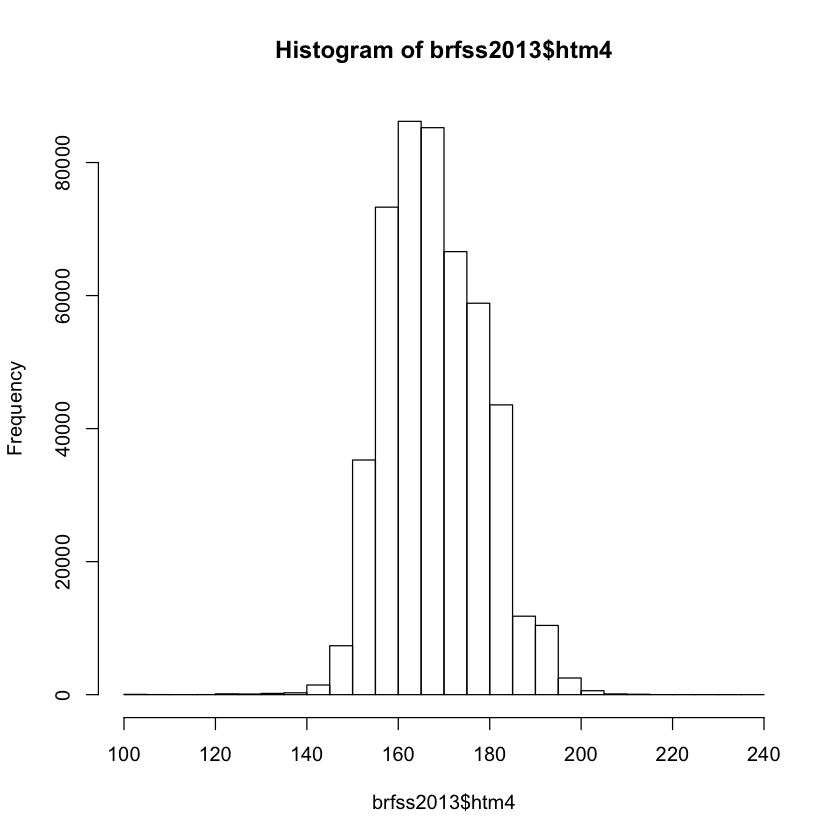

In [147]:
hist(brfss2013$htm4)

In [151]:
height_sample <- brfss2013[sample(1:nrow(brfss2013), 100, replace=FALSE),]

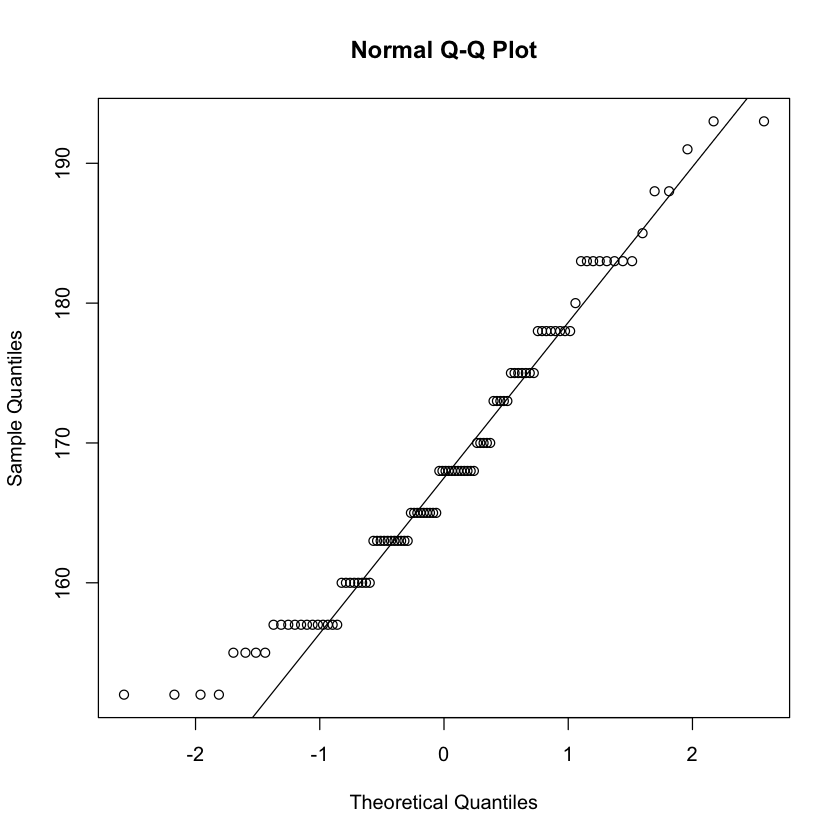

In [153]:
qqnorm(height_sample$htm4)
qqline(height_sample$htm4)

Computed Height In Meters (htm4) is very closely following normal distribution.